<a href="https://colab.research.google.com/github/SrutiGoteti/IIIT-AI-ML-labs-and-projects/blob/main/AIML_Module_01_Lab_03_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA AUGMENTATION: Using rotation, shearing, scaling and translation

**Importing the necessary dependencies**

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp
from sklearn.metrics import accuracy_score
import random
import seaborn as sns
from collections import defaultdict
from itertools import product


rng = np.random.default_rng(seed=42)

**Loading the data and preprocessing**

In [33]:
# Load data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Normalize
train_X = train_X / 255.0
test_X = test_X / 255.0

# Subsample for quick experimentation
train_X = train_X[::1200]
train_y = train_y[::1200]

**Defining function for classification(KNN) and accuracy**

In [3]:
def NN1(traindata, trainlabel, query):
    diff = traindata - query
    sq = diff * diff
    dist = sq.sum(1)
    return trainlabel[np.argmin(dist)]

def NN(traindata, trainlabel, testdata):
    traindata = traindata.reshape(-1, 28*28)
    testdata = testdata.reshape(-1, 28*28)
    return np.array([NN1(traindata, trainlabel, i) for i in testdata])

def Accuracy(gtlabel, predlabel):
    return (gtlabel == predlabel).sum() / len(gtlabel)

**Defining functions for augRotate, shear(as done in reference Notebook)**

In [36]:
def augRotate(sample, angleconstraint):
    if angleconstraint == 0:
        return sample
    if len(sample.shape) == 2:
        sample = np.expand_dims(sample, 0)
    angle = (rng.random(len(sample)) - 0.5) * angleconstraint
    nsample = sample.copy()
    for i in range(len(sample)):
        nsample[i] = rotate(sample[i], angle[i])
    return np.squeeze(nsample)

def shear(sample, amount):
    tform = AffineTransform(shear=amount)
    img = warp(sample, tform)
    col = img.sum(0).nonzero()[0]
    row = img.sum(1).nonzero()[0]
    if len(col) > 0 and len(row) > 0:
        xshift = int(sample.shape[0] / 2 - (row[0] + row[-1]) / 2)
        yshift = int(sample.shape[1] / 2 - (col[0] + col[-1]) / 2)
        img = np.roll(img, (xshift, yshift), (0, 1))
    return img


**Accuracy without any augmentation(for comparison purposes)**

In [5]:
preds_no_aug = NN(train_X, train_y, test_X[:50])
acc_no_aug = Accuracy(test_y[:50], preds_no_aug)
print("Accuracy without augmentation:", round(acc_no_aug*100, 2), "%")

Accuracy without augmentation: 78.0 %


**Effect of rotation(alone) on accuracy**

Rotation angle 0° → Accuracy: 78.0%
Rotation angle 10° → Accuracy: 74.0%
Rotation angle 20° → Accuracy: 66.0%
Rotation angle 30° → Accuracy: 82.0%
Rotation angle 45° → Accuracy: 68.0%


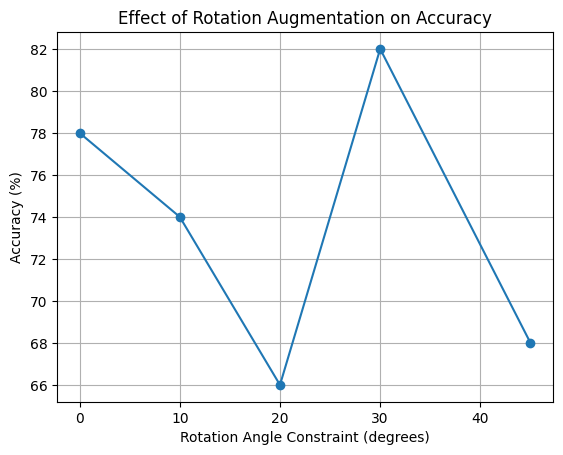

In [26]:
angle_constraints = [0, 10, 20, 30, 45]
accs = []

for angle in angle_constraints:
    aug_X = augRotate(train_X, angle)
    preds = NN(aug_X, train_y, test_X[:50])
    acc = Accuracy(test_y[:50], preds)
    accs.append(acc)
    print(f"Rotation angle {angle}° → Accuracy: {round(acc*100, 2)}%")

plt.plot(angle_constraints, np.array(accs)*100, marker='o')
plt.xlabel("Rotation Angle Constraint (degrees)")
plt.ylabel("Accuracy (%)")
plt.title("Effect of Rotation Augmentation on Accuracy")
plt.grid(True)
plt.show()

**Effect of shearing(alone) on accuracy**

Shear 0.0 → Accuracy: 68.0%
Shear 0.2 → Accuracy: 62.0%
Shear 0.4 → Accuracy: 42.0%
Shear 0.6 → Accuracy: 38.0%
Shear 0.8 → Accuracy: 20.0%


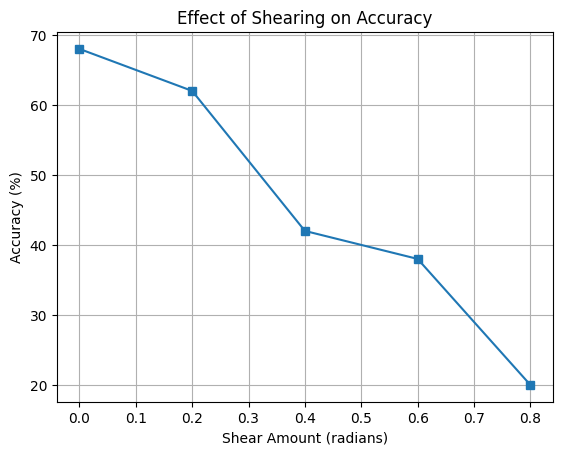

In [7]:
shear_vals = [0.0, 0.2, 0.4, 0.6, 0.8]
accs = []

for val in shear_vals:
    aug_X = np.array([shear(img, val) for img in train_X])
    preds = NN(aug_X, train_y, test_X[:50])
    acc = Accuracy(test_y[:50], preds)
    accs.append(acc)
    print(f"Shear {val} → Accuracy: {round(acc*100, 2)}%")

plt.plot(shear_vals, np.array(accs)*100, marker='s')
plt.xlabel("Shear Amount (radians)")
plt.ylabel("Accuracy (%)")
plt.title("Effect of Shearing on Accuracy")
plt.grid(True)
plt.show()


**Effect of both accuracy and shearing together on accuracy**

Angle: 0°, Shear: 0.0 → Accuracy: 68.0%
Angle: 0°, Shear: 0.2 → Accuracy: 62.0%
Angle: 0°, Shear: 0.4 → Accuracy: 42.0%
Angle: 0°, Shear: 0.6 → Accuracy: 38.0%
Angle: 0°, Shear: 0.8 → Accuracy: 20.0%
Angle: 10°, Shear: 0.0 → Accuracy: 70.0%
Angle: 10°, Shear: 0.2 → Accuracy: 66.0%
Angle: 10°, Shear: 0.4 → Accuracy: 44.0%
Angle: 10°, Shear: 0.6 → Accuracy: 28.0%
Angle: 10°, Shear: 0.8 → Accuracy: 18.0%
Angle: 20°, Shear: 0.0 → Accuracy: 58.0%
Angle: 20°, Shear: 0.2 → Accuracy: 62.0%
Angle: 20°, Shear: 0.4 → Accuracy: 46.0%
Angle: 20°, Shear: 0.6 → Accuracy: 24.0%
Angle: 20°, Shear: 0.8 → Accuracy: 6.0%
Angle: 30°, Shear: 0.0 → Accuracy: 68.0%
Angle: 30°, Shear: 0.2 → Accuracy: 70.0%
Angle: 30°, Shear: 0.4 → Accuracy: 46.0%
Angle: 30°, Shear: 0.6 → Accuracy: 32.0%
Angle: 30°, Shear: 0.8 → Accuracy: 12.0%
Angle: 45°, Shear: 0.0 → Accuracy: 54.0%
Angle: 45°, Shear: 0.2 → Accuracy: 54.0%
Angle: 45°, Shear: 0.4 → Accuracy: 54.0%
Angle: 45°, Shear: 0.6 → Accuracy: 30.0%
Angle: 45°, Shear: 0.8

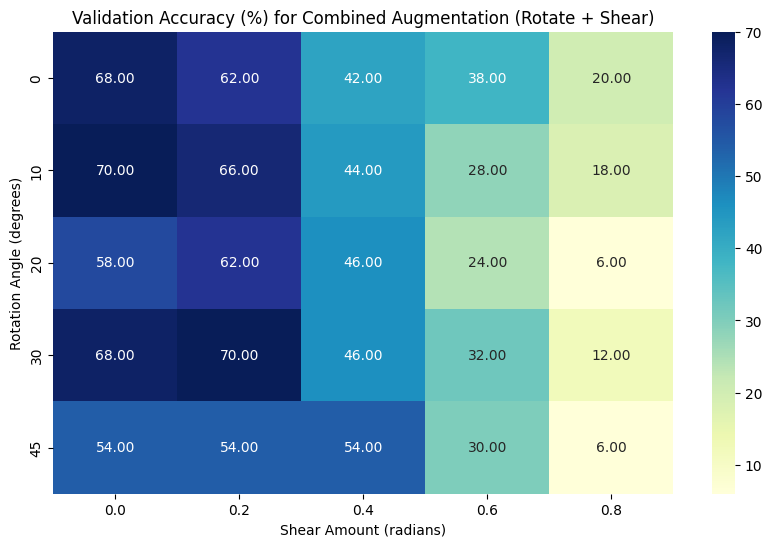

In [51]:
# Define parameter ranges
angle_constraints = [0, 10, 20, 30, 45]
shear_vals = [0.0, 0.2, 0.4, 0.6, 0.8]

# Store results
combined_accs = np.zeros((len(angle_constraints), len(shear_vals)))

# Grid search
for i, angle in enumerate(angle_constraints):
    for j, shear_amt in enumerate(shear_vals):
        # Apply combined augmentation
        rot_imgs = augRotate(train_X, angle)
        comb_imgs = np.array([shear(img, shear_amt) for img in rot_imgs])

        # Predict & compute accuracy
        preds = NN(comb_imgs, train_y, test_X[:50])
        acc = Accuracy(test_y[:50], preds)
        combined_accs[i, j] = acc
        print(f"Angle: {angle}°, Shear: {shear_amt} → Accuracy: {round(acc*100, 2)}%")

# Heatmap of results
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(combined_accs * 100, annot=True, fmt=".2f", cmap="YlGnBu",
            xticklabels=shear_vals, yticklabels=angle_constraints)
plt.xlabel("Shear Amount (radians)")
plt.ylabel("Rotation Angle (degrees)")
plt.title("Validation Accuracy (%) for Combined Augmentation (Rotate + Shear)")
plt.show()


**In the below code we are trying to find out what is the best combiation of rotation and shearing to get the maximum accuracy over 50 runs**

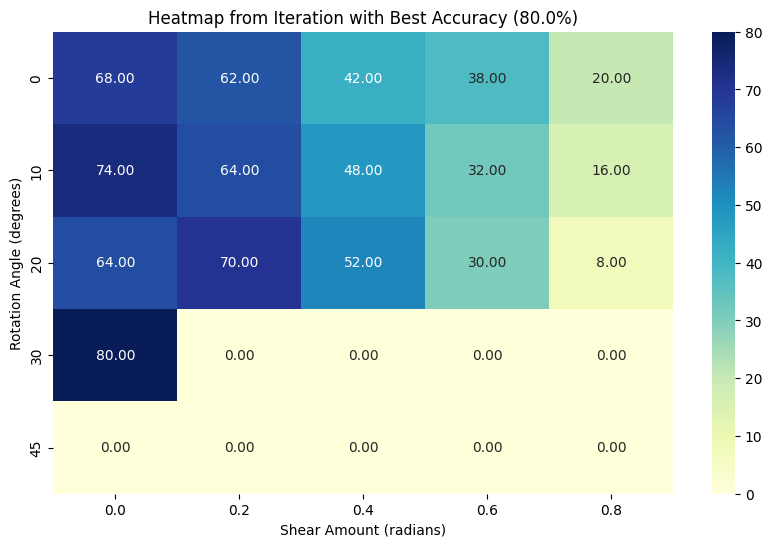

🏆 Best Accuracy across 50 runs: 80.0%
Best combination → Rotation: 30°, Shear: 0.0


In [52]:
max_acc = 0.0
best_combo = None
best_iter_matrix = None

# Repeat for multiple iterations
for it in range(iterations):
    heat_iter = np.zeros((len(angle_constraints), len(shear_vals)))

    for i, angle in enumerate(angle_constraints):
        for j, shear_amt in enumerate(shear_vals):
            rot_imgs = augRotate(train_X, angle)
            comb_imgs = np.array([shear(img, shear_amt) for img in rot_imgs])
            preds = NN(comb_imgs, train_y, test_X[:50])
            acc = Accuracy(test_y[:50], preds)
            heat_iter[i, j] = acc

            # Track the maximum accuracy seen so far
            if acc > max_acc:
                max_acc = acc
                best_combo = (angle, shear_amt)
                best_iter_matrix = heat_iter.copy()

# Heatmap of the iteration that gave the best result
plt.figure(figsize=(10, 6))
sns.heatmap(best_iter_matrix * 100, annot=True, fmt=".2f", cmap="YlGnBu",
            xticklabels=shear_vals, yticklabels=angle_constraints)
plt.xlabel("Shear Amount (radians)")
plt.ylabel("Rotation Angle (degrees)")
plt.title(f"Heatmap from Iteration with Best Accuracy ({round(max_acc*100, 2)}%)")
plt.show()

# Print the best combo
print(f" Bet Accuracy across {iterations} runs: {round(max_acc * 100, 2)}%")
print(f"Best combination → Rotation: {best_combo[0]}°, Shear: {best_combo[1]}")


**We see that by running it for about 50 iterations the maximum accuracy we are getting for both the rotation and shearing is 80% that is 2% more than without using any augmentation.However, this is not a very good measure since we are using rng, the result combination may be different each time.**

**Therefore, we can use the average and find the top 10 combinations**

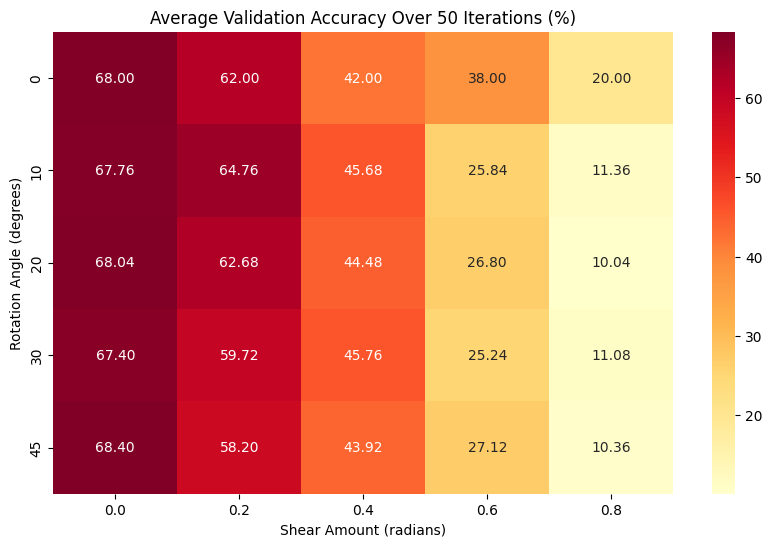

🔝 Top 10 most frequent best combinations across runs:

Angle: 45°, Shear: 0.0 → appeared in top 10: 50 times
Angle: 0°, Shear: 0.0 → appeared in top 10: 50 times
Angle: 20°, Shear: 0.0 → appeared in top 10: 50 times
Angle: 10°, Shear: 0.2 → appeared in top 10: 50 times
Angle: 30°, Shear: 0.0 → appeared in top 10: 50 times
Angle: 0°, Shear: 0.2 → appeared in top 10: 50 times
Angle: 10°, Shear: 0.0 → appeared in top 10: 50 times
Angle: 20°, Shear: 0.2 → appeared in top 10: 50 times
Angle: 30°, Shear: 0.2 → appeared in top 10: 47 times
Angle: 45°, Shear: 0.2 → appeared in top 10: 47 times


In [21]:
# Define ranges
angle_constraints = [0, 10, 20, 30, 45]
shear_vals = [0.0, 0.2, 0.4, 0.6, 0.8]

iterations = 50
heat_sum = np.zeros((len(angle_constraints), len(shear_vals)))
combo_counts = defaultdict(int)

# Run for multiple iterations
for it in range(iterations):
    heat_iter = np.zeros((len(angle_constraints), len(shear_vals)))

    for i, angle in enumerate(angle_constraints):
        for j, shear_amt in enumerate(shear_vals):
            rot_imgs = augRotate(train_X, angle)
            comb_imgs = np.array([shear(img, shear_amt) for img in rot_imgs])
            preds = NN(comb_imgs, train_y, test_X[:50])
            acc = Accuracy(test_y[:50], preds)
            heat_iter[i, j] = acc

    heat_sum += heat_iter

    # Get top-5 combinations for this iteration
    flat_indices = np.argsort(heat_iter.ravel())[::-1][:10]
    for idx in flat_indices:
        i, j = np.unravel_index(idx, heat_iter.shape)
        combo = (angle_constraints[i], shear_vals[j])
        combo_counts[combo] += 1

heat_avg = heat_sum / iterations

# Heatmap of average accuracies
plt.figure(figsize=(10, 6))
sns.heatmap(heat_avg * 100, annot=True, fmt=".2f", cmap="YlOrRd",
            xticklabels=shear_vals, yticklabels=angle_constraints)
plt.xlabel("Shear Amount (radians)")
plt.ylabel("Rotation Angle (degrees)")
plt.title(f"Average Validation Accuracy Over {iterations} Iterations (%)")
plt.show()

# Print the top 5 most frequently occurring best combinations
top_combos = sorted(combo_counts.items(), key=lambda x: -x[1])[:10]
print("🔝 Top 10 most frequent best combinations across runs:\n")
for combo, count in top_combos:
    print(f"Angle: {combo[0]}°, Shear: {combo[1]} → appeared in top 10: {count} times")


**Now we move onto using other augmentation techniques: Scaling, translation**

In [44]:
def scale(sample, scale_factor=1.2):
    tform = AffineTransform(scale=(scale_factor, scale_factor))
    img = warp(sample, tform)
    return center_crop(img, sample.shape)

def translate(sample, tx=0.1, ty=0.1):
    tform = AffineTransform(translation=(tx * sample.shape[1], ty * sample.shape[0]))
    img = warp(sample, tform)
    return center_crop(img, sample.shape)

def center_crop(img, original_shape):
    col = img.sum(0).nonzero()[0]
    row = img.sum(1).nonzero()[0]
    if len(col) > 0 and len(row) > 0:
        xshift = int(original_shape[0] / 2 - (row[0] + row[-1]) / 2)
        yshift = int(original_shape[1] / 2 - (col[0] + col[-1]) / 2)
        img = np.roll(img, (xshift, yshift), (0, 1))
    return img


**Apply all the augmentations**

In [45]:
def augment_all(x, count=5):
    aug_imgs = [x]
    for _ in range(count - 1):
        img = x.copy()
        if random.random() < 0.5:
            img = rotate(img, random.uniform(-30, 30), mode='edge')
        if random.random() < 0.5:
            img = shear(img, random.uniform(-0.3, 0.3))
        if random.random() < 0.5:
            img = scale(img, random.uniform(0.9, 1.1))
        if random.random() < 0.5:
            img = translate(img, random.uniform(-0.2, 0.2), random.uniform(-0.2, 0.2))
        aug_imgs.append(img)
    return aug_imgs


**Let us take 50 samples**

1 augmentations/sample → Accuracy: 78.0%
2 augmentations/sample → Accuracy: 64.0%
3 augmentations/sample → Accuracy: 72.0%
4 augmentations/sample → Accuracy: 70.0%
5 augmentations/sample → Accuracy: 74.0%


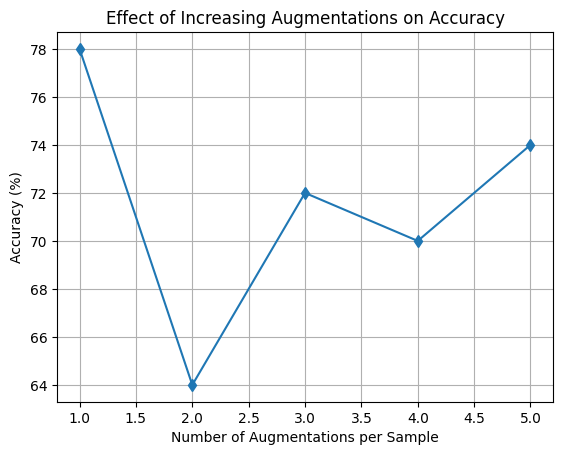

In [47]:
def few_samples_per_class(X, y, n_per_class):
    classes = np.unique(y)
    chosen_X, chosen_y = [], []
    for cls in classes:
        idx = np.where(y == cls)[0][:n_per_class]
        chosen_X.extend(X[idx])
        chosen_y.extend(y[idx])
    return np.array(chosen_X), np.array(chosen_y)

samples_per_digit = 50
X_small, y_small = few_samples_per_class(train_X, train_y, samples_per_digit)

aug_counts = [1, 2, 3, 4, 5]
accs_aug = []

for count in aug_counts:
    augX, augY = [], []
    for x, y in zip(X_small, y_small):
        imgs = augment_all(x, count)
        augX.extend(imgs)
        augY.extend([y] * len(imgs))
    augX = np.array(augX)
    augY = np.array(augY)

    preds = NN(augX, augY, test_X[:50])
    acc = Accuracy(test_y[:50], preds)
    accs_aug.append(acc)
    print(f"{count} augmentations/sample → Accuracy: {round(acc*100, 2)}%")

plt.plot(aug_counts, np.array(accs_aug)*100, marker='d')
plt.xlabel("Number of Augmentations per Sample")
plt.ylabel("Accuracy (%)")
plt.title("Effect of Increasing Augmentations on Accuracy")
plt.grid(True)
plt.show()


In [54]:
best_acc = max(accs_aug)
best_index = aug_counts[accs_aug.index(best_acc)]
print(f"\nHighest Accuracy Achieved: {round(best_acc*100, 2)}% using {best_index} augmentations/sample")



Highest Accuracy Achieved: 78.0% using 1 augmentations/sample


5 samples/class → Accuracy: 74.0%
10 samples/class → Accuracy: 66.0%
15 samples/class → Accuracy: 70.0%
20 samples/class → Accuracy: 72.0%
25 samples/class → Accuracy: 74.0%
30 samples/class → Accuracy: 70.0%
35 samples/class → Accuracy: 76.0%
40 samples/class → Accuracy: 80.0%
45 samples/class → Accuracy: 74.0%
50 samples/class → Accuracy: 66.0%


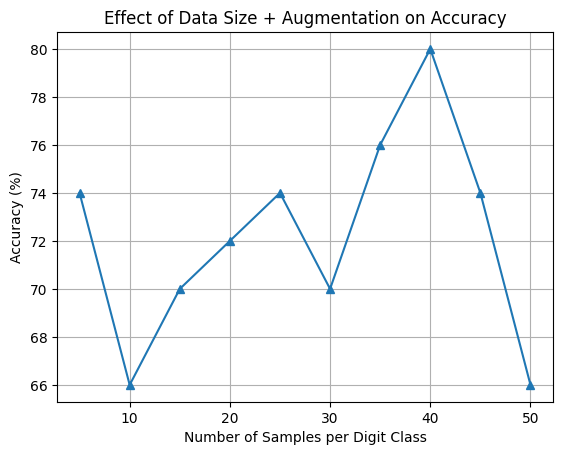


✅ Smallest dataset size to cross 50% accuracy: 5 samples/class


In [49]:
min_required = None
accs = []

for n in range(5, 51, 5):  # 5 to 50 samples per class
    X_small, y_small = few_samples_per_class(train_X, train_y, n)

    augX, augY = [], []
    for x, y in zip(X_small, y_small):
        imgs = augment_all(x, 4)
        augX.extend(imgs)
        augY.extend([y] * len(imgs))

    augX = np.array(augX)
    augY = np.array(augY)

    preds = NN(augX, augY, test_X[:50])
    acc = Accuracy(test_y[:50], preds)
    accs.append(acc)
    print(f"{n} samples/class → Accuracy: {round(acc*100, 2)}%")

    if acc > 0.5 and min_required is None:
        min_required = n

plt.plot(range(5, 51, 5), np.array(accs)*100, marker='^')
plt.xlabel("Number of Samples per Digit Class")
plt.ylabel("Accuracy (%)")
plt.title("Effect of Data Size + Augmentation on Accuracy")
plt.grid(True)
plt.show()

if min_required:
    print(f"\n Smallest dataset size to cross 50% accuracy: {min_required} samples/class")
else:
    print("\nDid not cross 50% accuracy with up to 50 samples/class")
